In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline

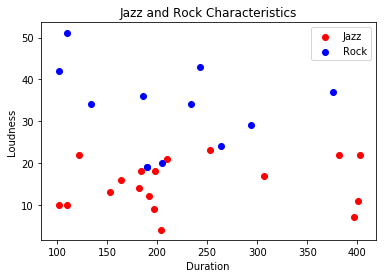

In [37]:
music = pd.DataFrame()

# Some data to play with.
music['duration'] = [184, 134, 243, 186, 122, 197, 294, 382, 102, 264, 
                     205, 110, 307, 110, 397, 153, 190, 192, 210, 403,
                     164, 198, 204, 253, 234, 190, 182, 401, 376, 102]
music['loudness'] = [18, 34, 43, 36, 22, 9, 29, 22, 10, 24, 
                     20, 10, 17, 51, 7, 13, 19, 12, 21, 22,
                     16, 18, 4, 23, 34, 19, 14, 11, 37, 42]

# We know whether the songs in our training data are jazz or not.
music['jazz'] = [ 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
                  0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
                  1, 1, 1, 1, 0, 0, 1, 1, 0, 0]


# Look at our data.
plt.scatter(
    music[music['jazz'] == 1].duration,
    music[music['jazz'] == 1].loudness,
    color='red'
)
plt.scatter(
    music[music['jazz'] == 0].duration,
    music[music['jazz'] == 0].loudness,
    color='blue'
)
plt.legend(['Jazz', 'Rock'])
plt.title('Jazz and Rock Characteristics')
plt.xlabel('Duration')
plt.ylabel('Loudness')
plt.show()

In [22]:
k_predict(24,190,5)

1

In [40]:
import math
#distance function calculating the distance between two points using pythagorean theorem
def distance_function(loudness, duration, g_loudness, g_duration): 
    return math.sqrt(((g_duration - duration)**2) + ((g_loudness - loudness)**2))

#input the point for the algorithm to predict 
#creates a new column called distance where the distance from each point in the data frame to the input is
#being calculated by applying the distance function to that point
def predictor(loudness, duration, k):
    music['distance']= music.apply(lambda row: distance_function(row['loudness'], row['duration'], loudness, duration), axis=1)
    smallest = music.nsmallest(k,'distance')
    return smallest['jazz'].value_counts().index.values[0]
                                                              
    
def predict_prob(loudness, duration, k):
    music['distance'] = music.apply(lambda row: distance_function(row['loudness'], row['duration'],loudness, duration), axis=1)
    
    smallest = music.nsmallest(k, 'distance')
    
    prob = smallest['jazz'].value_counts()
    output = {}
    for index, value in smallest['jazz'].value_counts().iteritems():
        output[index]="{0:.2f}".format(round(value/k, 2))
    
    return output

   
    


   

In [41]:
predict_prob(24,190,5)

{0: '0.60', 1: '0.40'}

In [42]:
predictor(24,190,5)

1